# Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spectral_analysis as sa
from math import floor
import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# EOPM characterization

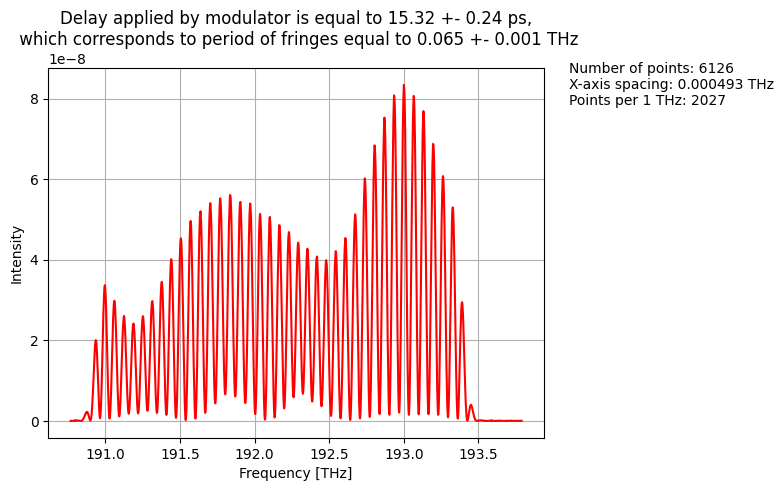

In [2]:
spectr = sa.load_csv("eopm_interference.csv")
spectr.wl_to_freq()
spectr.constant_spacing()
period, u_p = spectr.find_period(0.25)
delay = 1/period
u_d = u_p/period**2
sa.plot(spectr, "red", title = "Delay applied by modulator is equal to {} +- {} ps,\n which corresponds to period of fringes equal to {} +- {} THz".format(round(delay, 2), round(u_d, 2), round(period, 3), round(u_p, 3)))

# 70 uW, shear

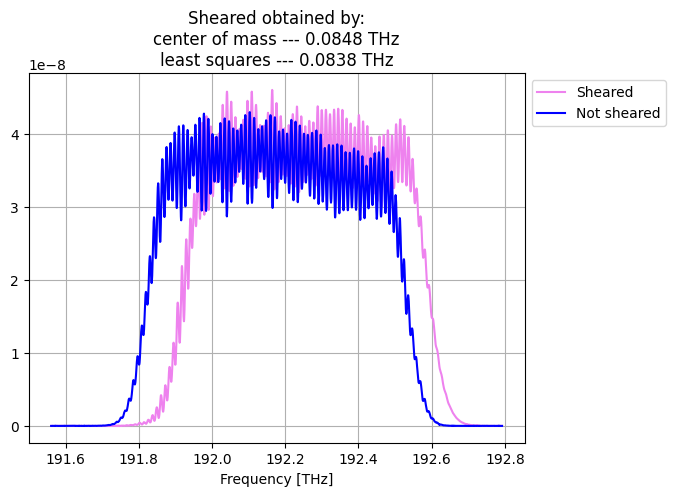

In [3]:
sheared = sa.load_csv("70uW/70_shear.csv")
not_sheared = sa.load_csv("70uW/70_no_shear.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()

sheared.constant_spacing()
not_sheared.constant_spacing()

ls = round(sa.find_shift(sheared, not_sheared), 4)
com = round(sheared.quantile(0.5) - not_sheared.quantile(0.5), 4)

sa.compare_plots([sheared, not_sheared], 
                 legend = ["Sheared", "Not sheared"], 
                 title = "Sheared obtained by:\ncenter of mass --- {} THz\nleast squares --- {} THz".format(com, ls))

# Model

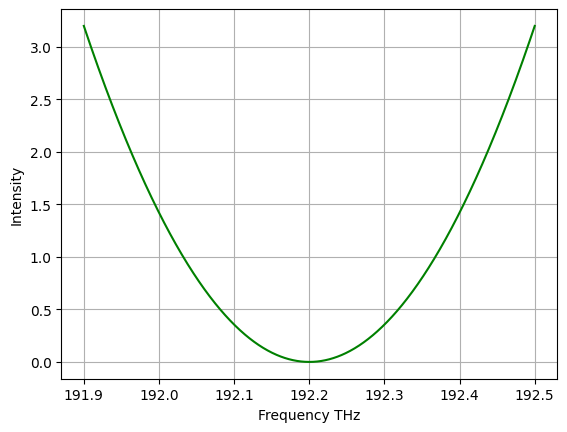

In [4]:
def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

X = np.linspace(191.9, 192.5, 1000)
Y = phase(X, 192.2, 82)

plt.plot(X, Y, color = "green")
plt.grid()
plt.xlabel("Frequency THz")
plt.ylabel("Intensity")
plt.show()

# SPIDER, 70uW, high visibility

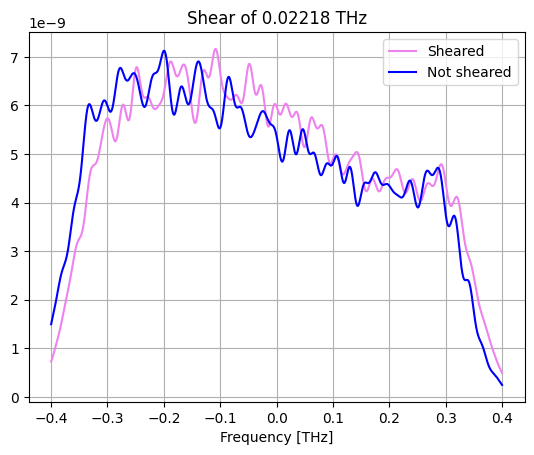

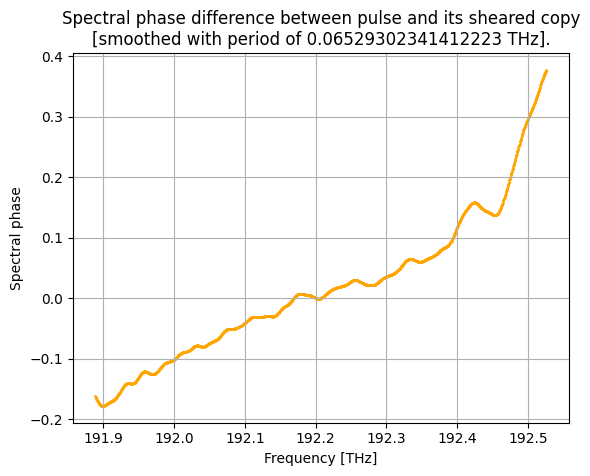

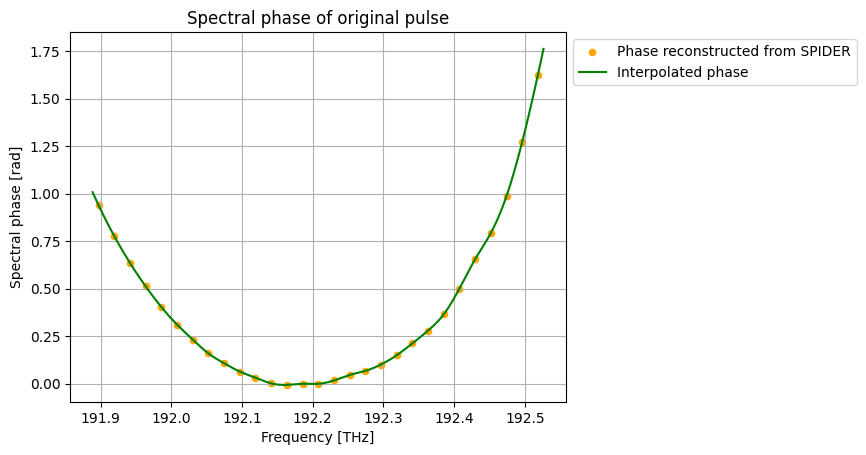

In [16]:
sa.spider("70uW/70_p_spectrum_high.csv",
          "70uW/70_t_spectrum_high.csv",
          smoothing_period = period,
          sheared_is_bigger = False,
          plot_shear = True)

# SPIDER, 70uW, low visibility

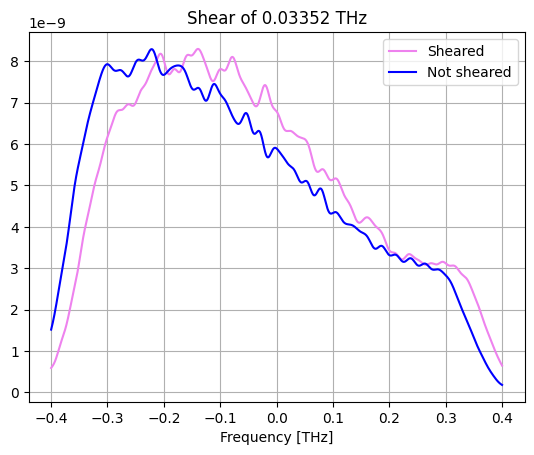

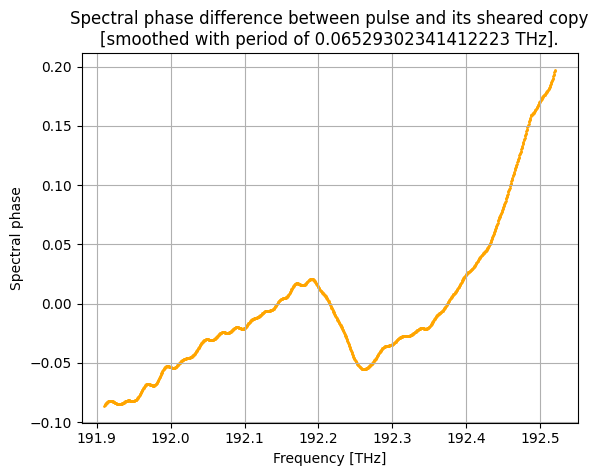

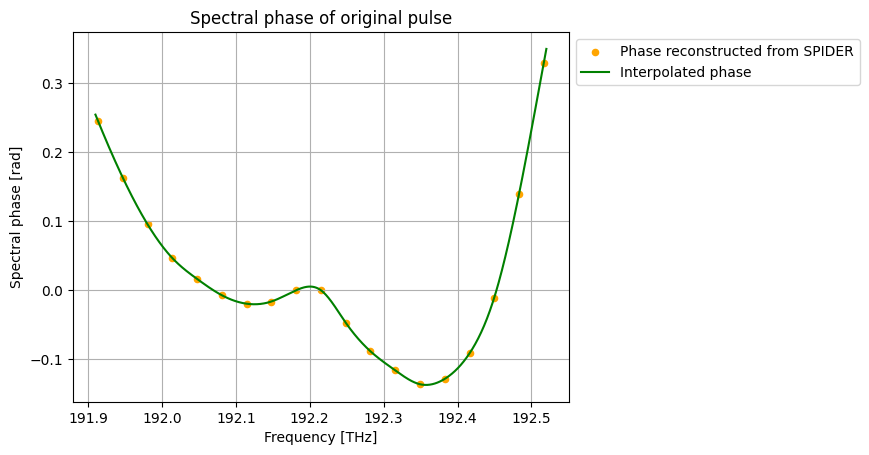

In [19]:
sa.spider("70uW/70_p_spectrum_low.csv",
          "70uW/70_t_spectrum_low.csv",
          smoothing_period = period,
          sheared_is_bigger = False,
          plot_shear = True)

# SPIDER, 50uW, high visibility

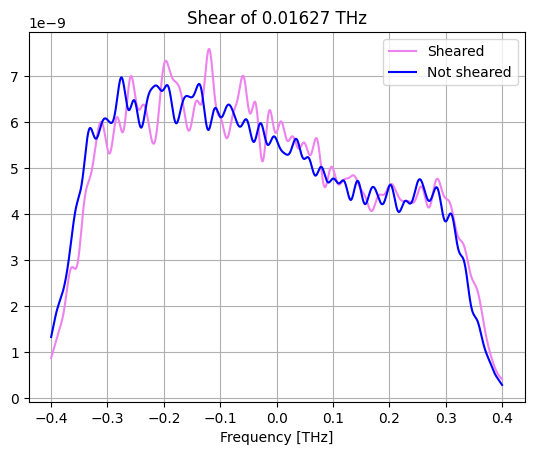

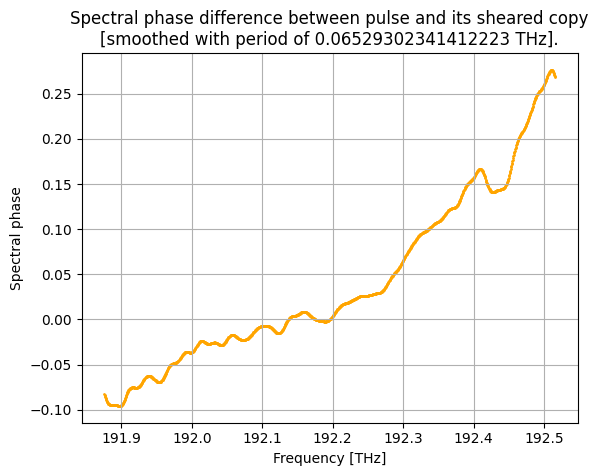

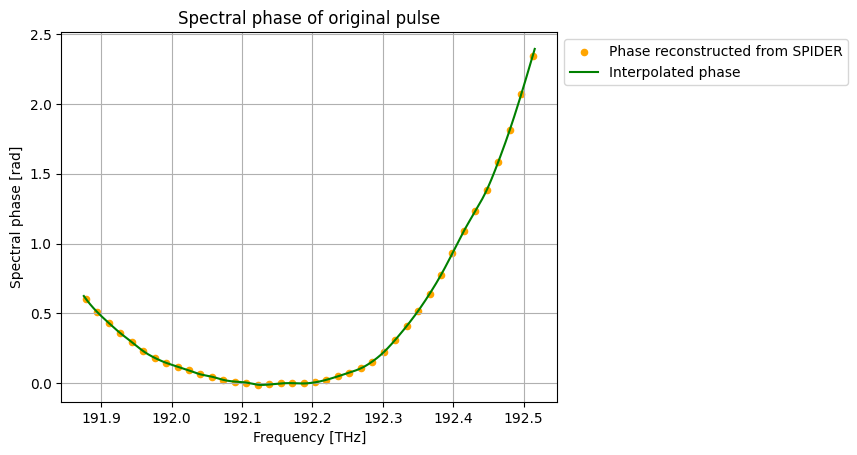

In [7]:
sa.spider("50uW/50_p_spectrum_high.csv",
          "50uW/50_t_spectrum_high.csv",
          smoothing_period = period,
          plot_shear = True)

# SPIDER, 50uW, low visibility

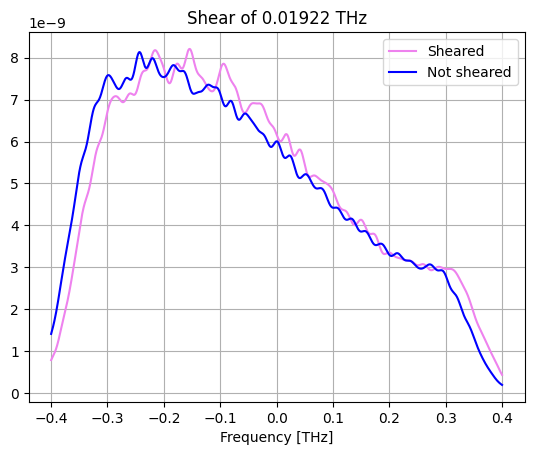

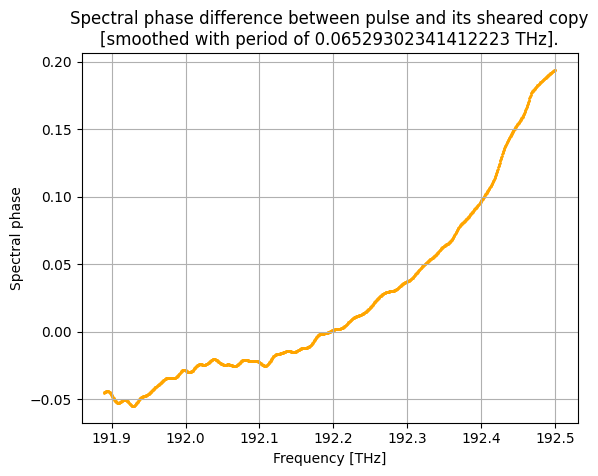

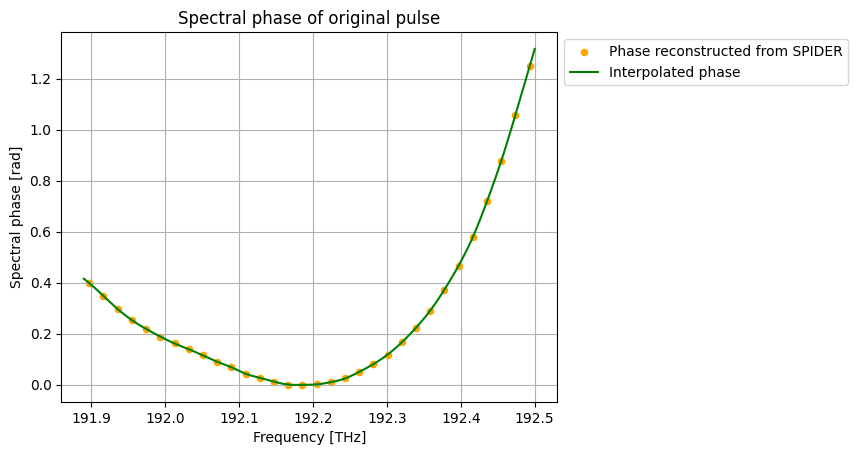

In [8]:
sa.spider("50uW/50_p_spectrum_low.csv",
          "50uW/50_t_spectrum_low.csv",
          smoothing_period = period,
          plot_shear = True)

# SPIDER, 50uW, visibility near zero

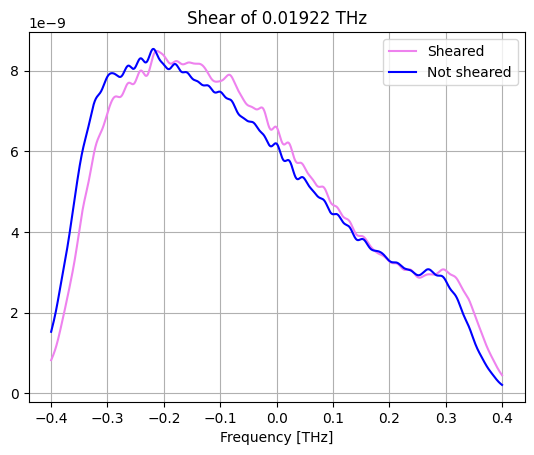

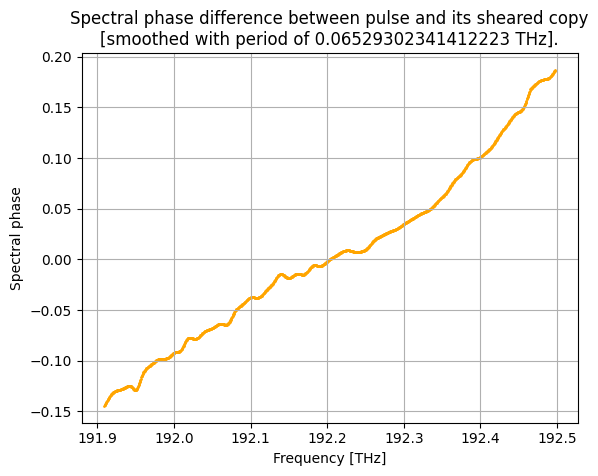

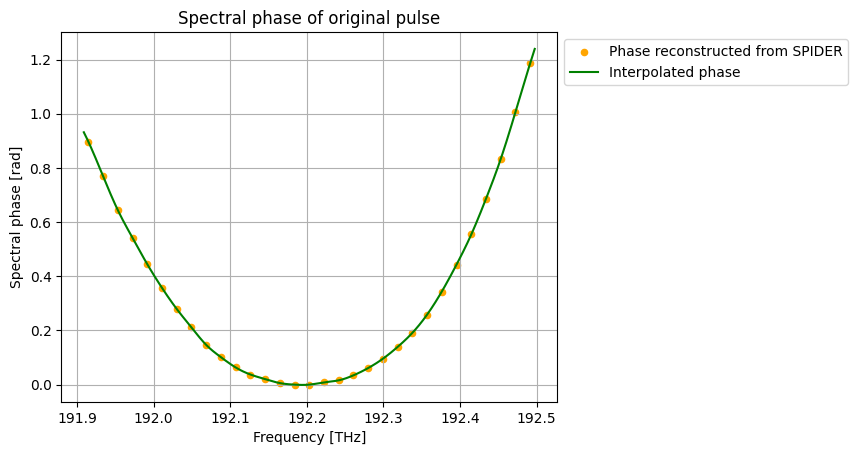

In [9]:
sa.spider("50uW/50_p_spectrum_zero.csv",
          "50uW/50_t_spectrum_zero.csv",
          smoothing_period = period,
          plot_shear = True)